# Graded: x of 40 correct
- [10] Contains correct number of plots (1 pt each, 10 pts total)
- [10] Contains correct layout (1 pt each, 10 pts total)
- [10] Each plot contains correct data (1 pt each, 10 pts total)
- [10] Titles, labels, and axes (1 pt each, 10 pts total)

Comments: 

*See Assignment 3 description below for quick links to each section of the notebook. Each task header contains a quick link back to the other quick links.*

***
# Assignment 3: Constructing a visual report with Matplotlib
<a id="assignment"></a>
You are performing an analysis of fuel efficiency in personal vehicles from model years 1970 - 1980. You have extracted the following data in `list` form:
- `all_mpgs`: Fuel economy (miles per gallon) for all selected vehicle models across all years
- `all_weights`: Weights (lbs) for all selected vehicle models across all years
- `unique_model_years`: A list of model years from 1970 to 1980
- `yearly_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles in each model year
- `yearly_mean_horsepower`: Average engine power (horsepower) for vehicles in each model year
- `origins_1970`: The origin for each vehicle from the 1970 model year
- `origins_1980`: The origin for each vehicle from the 1980 model year
- `origin_mean_mpgs`: Average fuel economy (miles per gallon) for vehicles from each origin
- `origin_mean_horsepower`: Average engine power (horsepower) for vehicles from each origin
- `origin_mean_cylinders`: Average number of engine cylinders for vehicles from each origin
- `origin_mean_displacement`: Average cylinder volume (cm^3) for vehicles from each origin
- `origin_mean_weight`: Average weight (lbs) for vehicles from each origin
- `origin_mean_acceleration`: Average acceleration (ft/s^2) for vehicles from each origin

Your task is to create a visual report for these data. You will create a single Matplotlib Figure containing the following subplots:
1. A **[scatter plot](#task1)** with `all_weights` on the x-axis and `all_mpgs` on the y-axis
2. A **[line plot with](#task2)** `unique_model_years` with **separate** y-axes for `yearly_mean_mpgs` and `yearly_mean_horsepower`. Include markers for each data point.
3. **[Two pie charts](#task3)**, one each for the number of models by origin in `origins_1970` and `origins_1980`
4. A series of **[6 bar plots](#task4)** with `origin_mean_mpgs`, `origin_mean_horsepower`, `origin_mean_cylinders`, `origin_mean_displacement`, `origin_mean_weight`, and `origin_mean_acceleration` on y-axis, and each should have `unique_origins` on the x-axis.

The subplots should use **[a layout with 3 rows](#task5)**:
- Row 1, three subplots: Scatter plot (item 1 above), 2 pie charts (item 3)
- Row 2, 1 subplot stretched across the figure: Line plot (item 2)
- Row 3, 6 subplots: 6 bar plots (item 4)

Be sure to give each subplot a title and label the axes with appropriate descriptor and units. You may customize the appearance (colors, marker types, etc.) in any way you think looks appealing
<br />
<br />
The next cell loads the data and should not be changed.

In [23]:
# Do not change this cell
import pandas as pd
import seaborn as sns

data = sns.load_dataset('mpg')

all_mpgs = data['mpg'].to_list()
all_weights = data['weight'].to_list()

unique_model_years = list(data['model_year'].unique())
unique_origins = sorted(list(data['origin'].unique()))

yearly_mean_mpgs = data.groupby('model_year').mean(numeric_only=True)['mpg'].to_list()
yearly_mean_horsepower = data.groupby('model_year').mean(numeric_only=True)['horsepower'].to_list()

origins_1970 = data.loc[data['model_year'] == 70, 'origin']
origins_1980 = data.loc[data['model_year'] == 80, 'origin']

origin_mean_mpgs = data.groupby('origin').mean(numeric_only=True)['mpg'].to_list()
origin_mean_horsepower = data.groupby('origin').mean(numeric_only=True)['horsepower'].to_list()
origin_mean_cylinders = data.groupby('origin').mean(numeric_only=True)['cylinders'].to_list()
origin_mean_displacement = data.groupby('origin').mean(numeric_only=True)['displacement'].to_list()
origin_mean_weight = data.groupby('origin').mean(numeric_only=True)['weight'].to_list()
origin_mean_acceleration = data.groupby('origin').mean(numeric_only=True)['acceleration'].to_list()


***

In [8]:
# import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from tabulate import tabulate

# instance an array for grabbing our data
data_columns = ['all_mpgs', 'all_weights', 'unique_model_years', 'unique_origins', 'yearly_mean_mpgs', 'yearly_mean_horsepower', 'origins_1970', 'origins_1980', 'origin_mean_mpgs', 'origin_mean_horsepower', 'origin_mean_cylinders', 'origin_mean_displacement', 'origin_mean_weight', 'origin_mean_acceleration']

### Inspecting The Data
First lets take a look at what the data looks like for each of the variables we're given. Things to note:
- Not all of the arrays are of equal size or data type
- the 'origins_####' are `data frames`

In [ ]:
# silenced output for submissions readability
#for colnam in data_columns:
#   print(f'{colnam}: ', globals()[colnam]) # print the data to be used in the plots
#  print('\n')

In [ ]:
# silenced output for submissions readability
#for colnam in data_columns:
#    print(f'{colnam} size: ', len(globals()[colnam])) # length
#   print('\n')

In [28]:
# Task 3 will require us to create pie charts using data objects so we'll go ahead and do that here

pie_data_1970 = {
    'japan': origins_1970.value_counts()['japan'],
    'europe': origins_1970.value_counts()['europe'],
    'usa': origins_1970.value_counts()['usa']
}

pie_data_1980 = {
    'japan': origins_1980.value_counts()['japan'],
    'europe': origins_1980.value_counts()['europe'],
    'usa': origins_1980.value_counts()['usa']
}


***

### [**Task 1**](#assignment)

1. A scatter plot with `all_weights` on the x-axis and `all_mpgs` on the y-axis

<a id="task1"></a>

Text(0, 0.5, 'MPG')

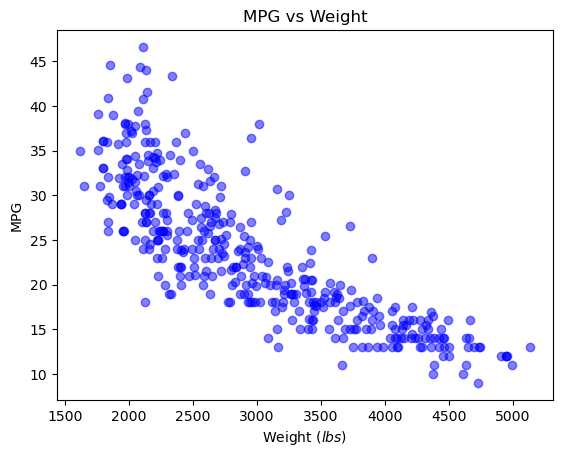

In [84]:
plt.scatter(all_weights, all_mpgs, color='blue', alpha=0.5)
plt.title('MPG vs Weight')
plt.xlabel(r'Weight ($lbs$)')    # use LaTeX formatting for labels given unit measurements in assignment (this appears later as well)
plt.ylabel('MPG')

***
### [**Task 2**](#assignment)

2. A line plot with `unique_model_years` with **separate** y-axes for `yearly_mean_mpgs` and `yearly_mean_horsepower`. Include markers for each data point.

<a id="task2"></a>

Text(0, 0.5, 'Mean Horsepower ($hp$)')

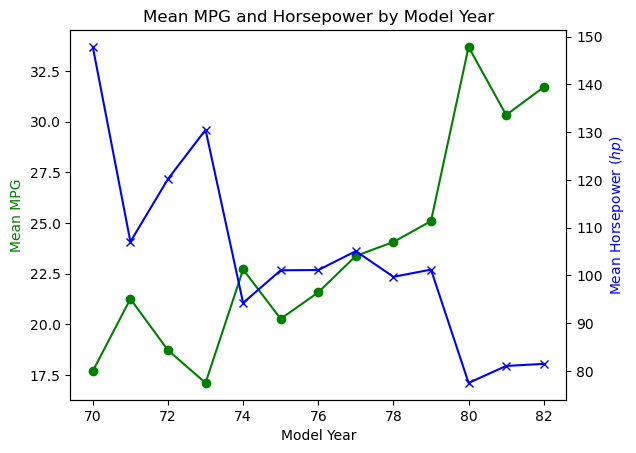

In [71]:
# Create a figure with 2 subplots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_title('Mean MPG and Horsepower by Model Year')

# Plot data for mean mpgs
ax1.plot(unique_model_years, yearly_mean_mpgs, 'g-', marker='o')
ax1.set_xlabel('Model Year')
ax1.set_ylabel('Mean MPG', color='g')

# Plot data for mean horsepower
ax2.plot(unique_model_years, yearly_mean_horsepower, 'b-', marker='x')
ax2.set_ylabel(r'Mean Horsepower ($hp$)', color='b')


***
### [**Task 3**](#assignment)

3. Two pie charts, one each for the number of models by origin in `origins_1970` and `origins_1980`

<a id="task3"></a>


Text(0.5, 1.0, '1980 Origin Distribution')

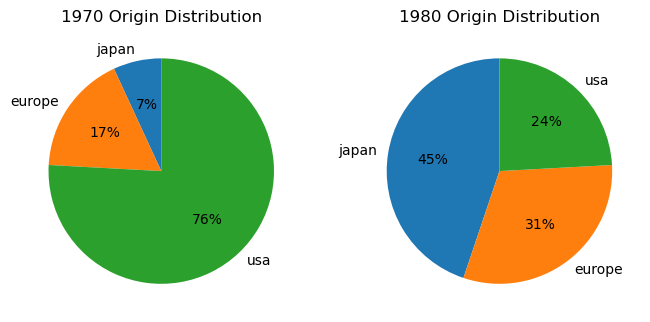

In [42]:
# Create a figure with 2 subplots
fig1 = plt.figure(figsize=(8, 4))
grid1 = gridspec.GridSpec(1, 2, figure=fig1)

# pie chart 1970
s1 = list(pie_data_1970.values())
l1 = list(pie_data_1970.keys())
ax1 = fig1.add_subplot(grid1[0])
ax1.pie(s1, labels=l1, autopct='%1.0f%%', startangle=90) # autopct is for percentage 
plt.title('1970 Origin Distribution')

# pie chart 1980
s2 = list(pie_data_1980.values())
l2 = list(pie_data_1980.keys())
ax2 = fig1.add_subplot(grid1[1])
ax2.pie(s2, labels=l2, autopct='%1.0f%%', startangle=90) # startangle is for the angle of the first slice, to keep the relative order of the slices the same
plt.title('1980 Origin Distribution')



***
### [**Task 4**](#assignment)

4. A series of 6 bar plots with `origin_mean_mpgs`, `origin_mean_horsepower`, `origin_mean_cylinders`, `origin_mean_displacement`, `origin_mean_weight`, and `origin_mean_acceleration` on y-axis, and each should have `unique_origins` on the x-axis.

<a id="task4"></a>

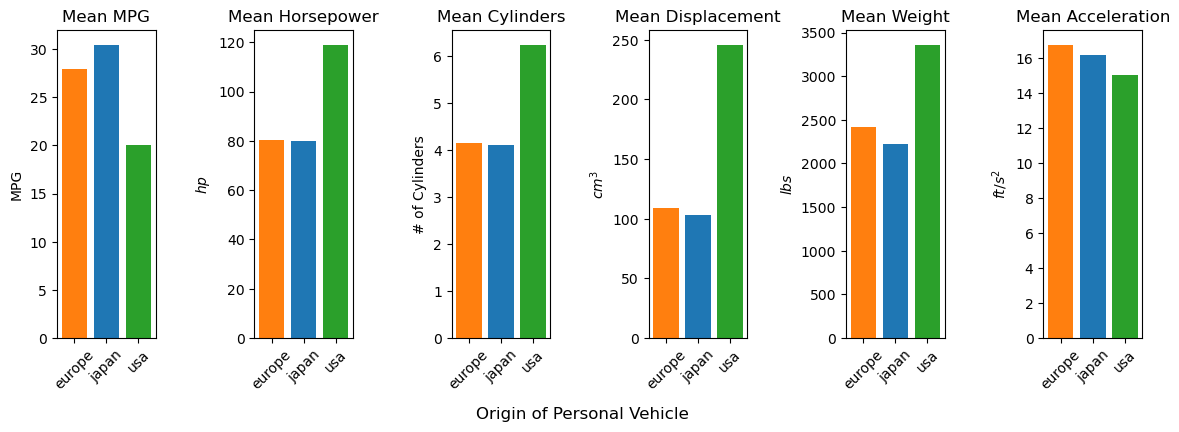

In [85]:
# Create a figure with 2 subplots
fig2 = plt.figure(figsize=(14, 4))
grid2 = gridspec.GridSpec(1, 6, figure=fig2)
colors = ['#ff7f0f', '#1f77b4', '#2ba02b']

# Plot data for mean mpgs
ax1 = fig2.add_subplot(grid2[0])
ax1.bar(unique_origins, origin_mean_mpgs, color=colors)
ax1.set_title('Mean MPG')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('MPG')
#ax1.set_xlabel('Origin')

# Plot data for mean horsepower
ax2 = fig2.add_subplot(grid2[1])
ax2.bar(unique_origins, origin_mean_horsepower, color=colors)
ax2.set_title('Mean Horsepower')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylabel(r'$hp$')
#ax2.set_xlabel('Origin')

# Plot data for mean cylinders
ax3 = fig2.add_subplot(grid2[2])
ax3.bar(unique_origins, origin_mean_cylinders, color=colors)
ax3.set_title('Mean Cylinders')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylabel('# of Cylinders')
#ax3.set_xlabel('Origin')

# Plot data for mean displacement
ax4 = fig2.add_subplot(grid2[3])
ax4.bar(unique_origins, origin_mean_displacement, color=colors)
ax4.set_title('Mean Displacement')
ax4.tick_params(axis='x', rotation=45)
ax4.set_ylabel(r'$cm^3$')
#ax4.set_xlabel('Origin')

# Plot data for mean weight
ax5 = fig2.add_subplot(grid2[4])
ax5.bar(unique_origins, origin_mean_weight, color=colors)
ax5.set_title('Mean Weight')
ax5.tick_params(axis='x', rotation=45)
ax5.set_ylabel(r'$lbs$')
#ax5.set_xlabel('Origin')

# Plot data for mean acceleration
ax6 = fig2.add_subplot(grid2[5])
ax6.bar(unique_origins, origin_mean_acceleration, color=colors)
ax6.set_title('Mean Acceleration')
ax6.tick_params(axis='x', rotation=45)
ax6.set_ylabel(r'$ft/s^2$')
#ax6.set_xlabel('Origin')

# formatting and spacing
fig2.supxlabel('Origin of Personal Vehicle', x=0.5, y=-0.1, size=12)
plt.subplots_adjust(wspace=1)


***
### [**Final Task**](#assignment)

Create a single visual report with the above plots.

The subplots should use a layout with 3 rows:
- Row 1, three subplots: `Scatter Plot` (item 1 above), `2 Pie Charts` (item 3)
- Row 2, 1 subplot stretched across the figure: `Line Plot` (item 2)
- Row 3, 6 subplots: `6 Bar Plots` (item 4)

<a id="task5"></a>

Text(0.5, 0.9, 'Unit 3 Assignment - Visual Report')

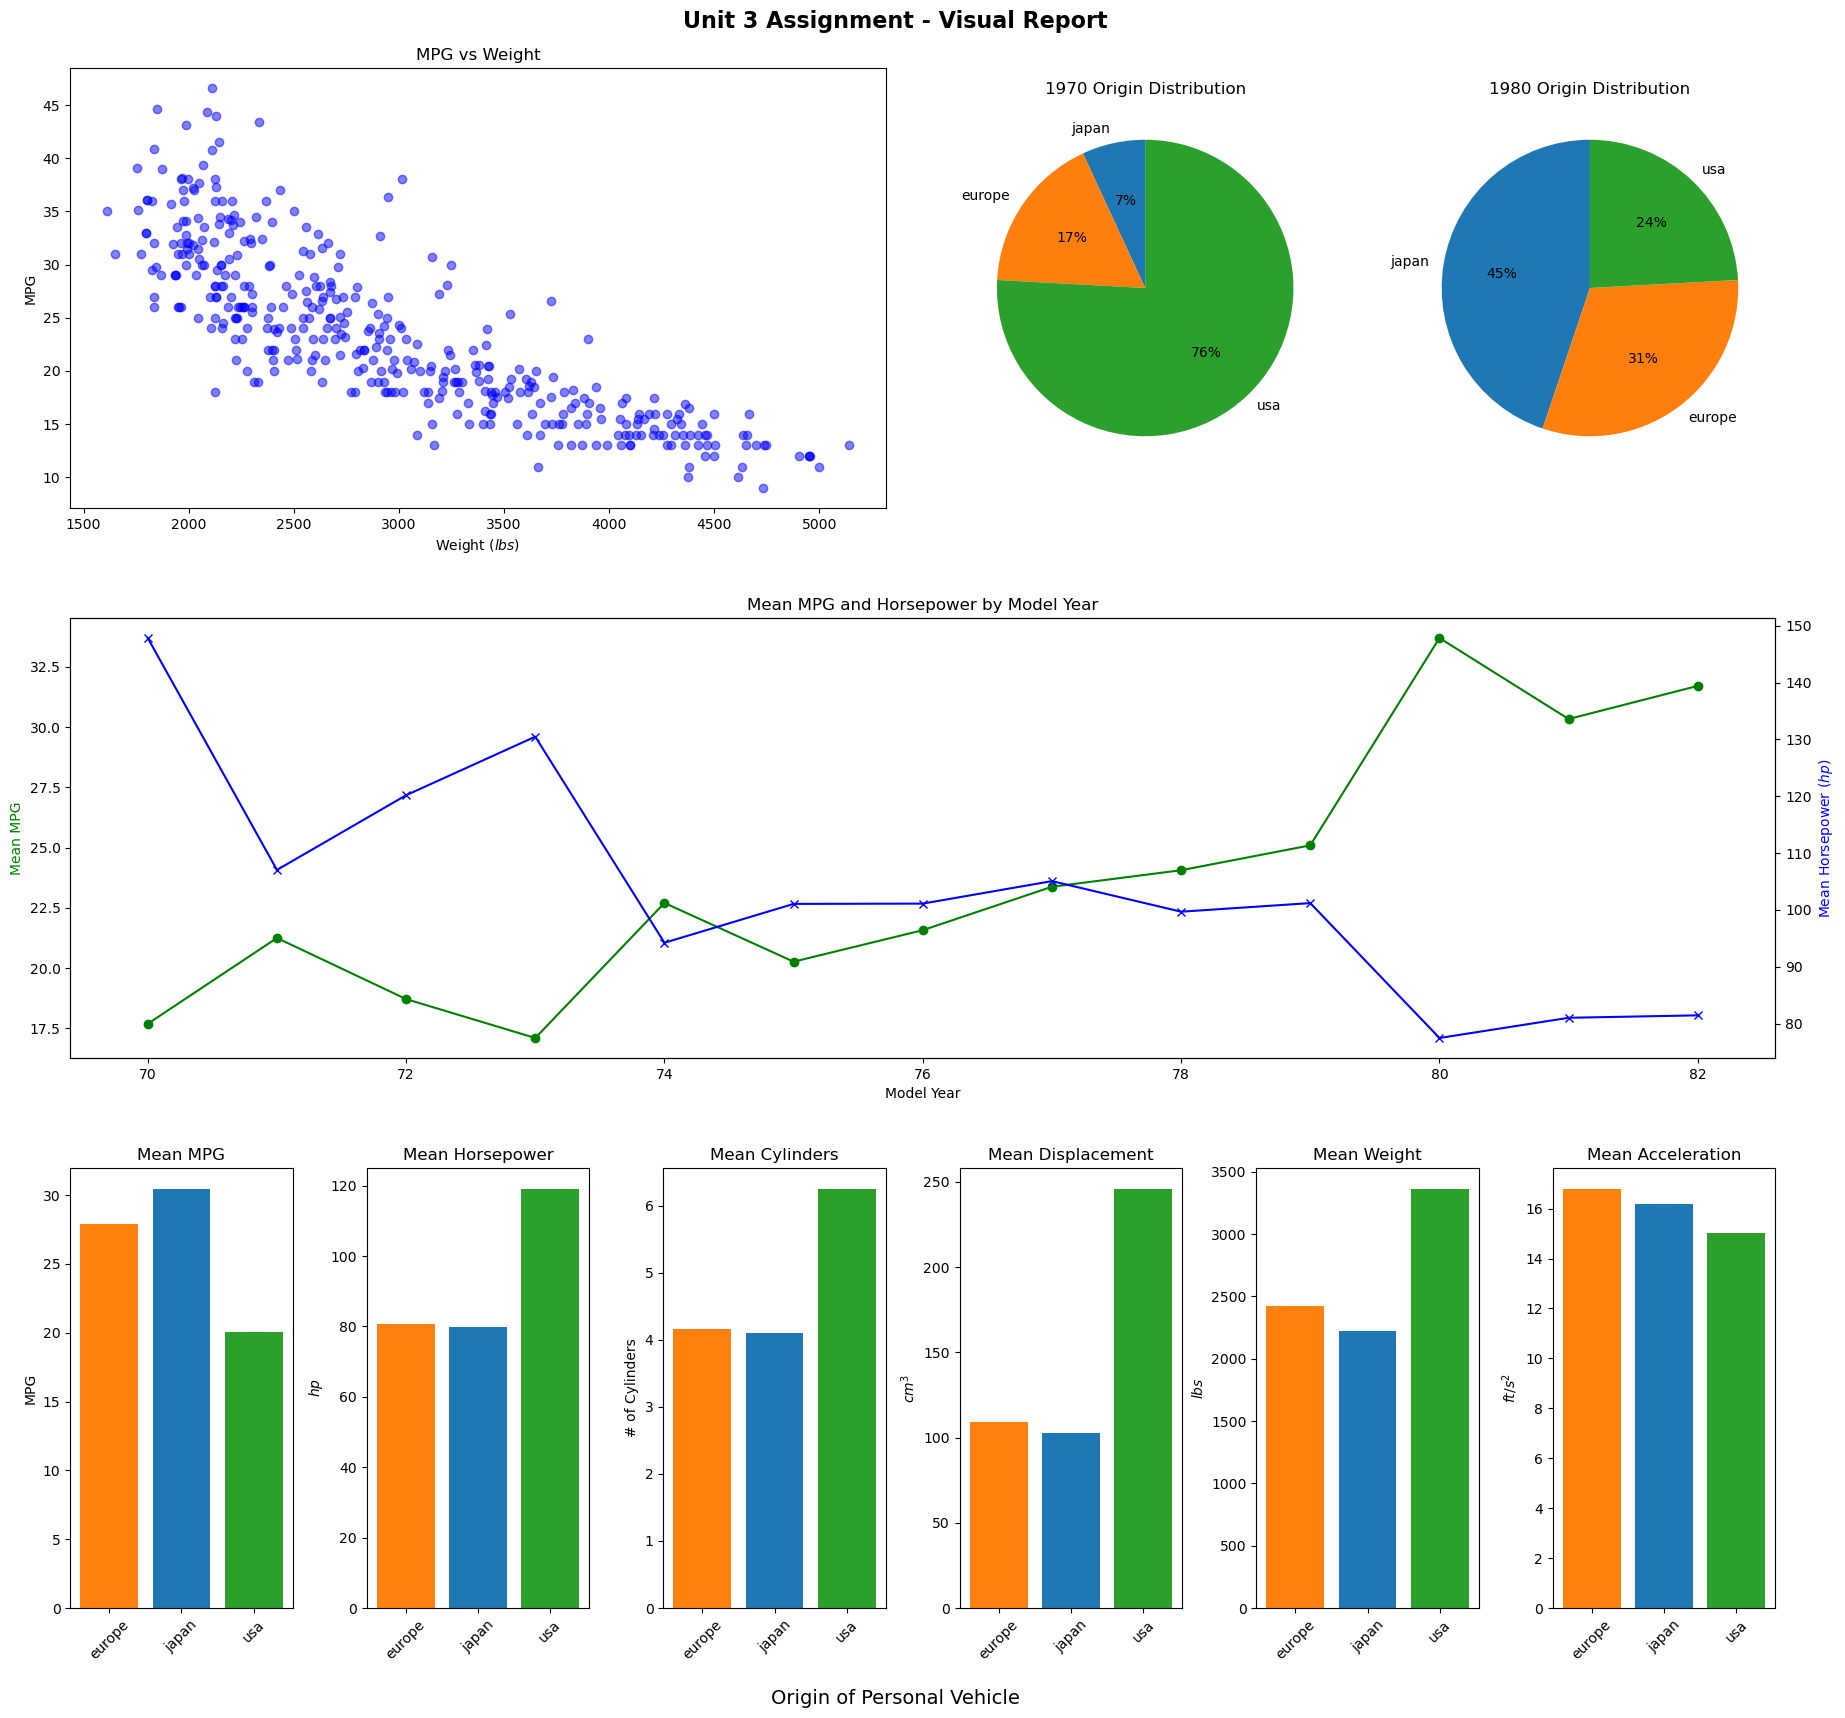

In [112]:
# Create a figure with 2 subplots
fig = plt.figure(figsize=(22, 20))
grid = gridspec.GridSpec(3, 12, figure=fig) # 3 rows, 12 columns I'm using double the number of columns necessary to provide better resolution for the pie charts
colors = ['#ff7f0f', '#1f77b4', '#2ba02b'] # these are the hexadecimals for the colors used in the pie charts, used for bar chart consistency

#------------------------------------------------[Row 1]------------------------------------------------

# Copy and paste from Task 1 and Task 3
ax1 = fig.add_subplot(grid[0, :6])
ax1.scatter(all_weights, all_mpgs, color='blue', alpha=0.5)
plt.title('MPG vs Weight')
plt.xlabel(r'Weight ($lbs$)')    # use LaTeX formatting for labels given unit measurements in assignment (this appears later as well)
plt.ylabel('MPG')

ax2 = fig.add_subplot(grid[0, 6:9])
ax2.pie(s1, labels=l1, autopct='%1.0f%%', startangle=90) # autopct is for percentage 
plt.title('1970 Origin Distribution')

ax3 = fig.add_subplot(grid[0, 9:12])
ax3.pie(s2, labels=l2, autopct='%1.0f%%', startangle=90) # startangle is for the angle of the first slice, to keep the relative order of the slices the same
plt.title('1980 Origin Distribution')

#------------------------------------------------[Row 2]------------------------------------------------

# Copy and paste from Task 2
ax4 = fig.add_subplot(grid[1, :12])
ax5 = ax4.twinx()
ax4.set_title('Mean MPG and Horsepower by Model Year')

# Plot data for mean mpgs
ax4.plot(unique_model_years, yearly_mean_mpgs, 'g-', marker='o')
ax4.set_xlabel('Model Year')
ax4.set_ylabel('Mean MPG', color='g')

# Plot data for mean horsepower
ax5.plot(unique_model_years, yearly_mean_horsepower, 'b-', marker='x')
ax5.set_ylabel(r'Mean Horsepower ($hp$)', color='b')

#------------------------------------------------[Row 3]------------------------------------------------

# Copy and paste from Task 4
# adjust necessary parameters to fit the new grid

# Plot data for mean mpgs
ax6 = fig.add_subplot(grid[2, :2])
ax6.bar(unique_origins, origin_mean_mpgs, color=colors)
ax6.set_title('Mean MPG')
ax6.tick_params(axis='x', rotation=45)
ax6.set_ylabel('MPG')
#ax1.set_xlabel('Origin')

# Plot data for mean horsepower
ax7 = fig.add_subplot(grid[2, 2:4])
ax7.bar(unique_origins, origin_mean_horsepower, color=colors)
ax7.set_title('Mean Horsepower')
ax7.tick_params(axis='x', rotation=45)
ax7.set_ylabel(r'$hp$')
#ax2.set_xlabel('Origin')

# Plot data for mean cylinders
ax8 = fig.add_subplot(grid[2, 4:6])
ax8.bar(unique_origins, origin_mean_cylinders, color=colors)
ax8.set_title('Mean Cylinders')
ax8.tick_params(axis='x', rotation=45)
ax8.set_ylabel('# of Cylinders')
#ax3.set_xlabel('Origin')

# Plot data for mean displacement
ax9 = fig.add_subplot(grid[2, 6:8])
ax9.bar(unique_origins, origin_mean_displacement, color=colors)
ax9.set_title('Mean Displacement')
ax9.tick_params(axis='x', rotation=45)
ax9.set_ylabel(r'$cm^3$')
#ax4.set_xlabel('Origin')

# Plot data for mean weight
ax10 = fig.add_subplot(grid[2, 8:10])
ax10.bar(unique_origins, origin_mean_weight, color=colors)
ax10.set_title('Mean Weight')
ax10.tick_params(axis='x', rotation=45)
ax10.set_ylabel(r'$lbs$')
#ax5.set_xlabel('Origin')

# Plot data for mean acceleration
ax11 = fig.add_subplot(grid[2, 10:12])
ax11.bar(unique_origins, origin_mean_acceleration, color=colors)
ax11.set_title('Mean Acceleration')
ax11.tick_params(axis='x', rotation=45)
ax11.set_ylabel(r'$ft/s^2$')
#ax6.set_xlabel('Origin')

# formatting and spacing
fig.supxlabel('Origin of Personal Vehicle', x=0.5, y=0.06, size=14) # add common x-axis label to last row of plots
plt.subplots_adjust(wspace=1, hspace=0.25)  
fig.text(0.5, 0.9, 'Unit 3 Assignment - Visual Report', horizontalalignment='center', fontsize=16, weight='bold', color='black') # add title to assignment report
